# Introduction to Julia

Reference: [The Julia Documentation](https://docs.julialang.org).

This lecture gives an overview of Julia. [The Julia–Matlab–Python Cheatsheet](https://cheatsheets.quantecon.org)
Is a valuable resource for translating between the three languages.

In these notes we focus on the aspects of Julia and computing that are essential to Numerical computing:

1. Integers: how does a computer represent an integer?
2. Strings and parsing: how do we manipulate strings in Julia? How can we convert a string of bits to an Integer?
3. Vectors and matrices: how do we represent vectors and matrices on a computer? 
4. Types: how can we make our own types, for example, to represent complex numbers or rationals?
5. Loops and branches: how do we write `if`, `for`, `while` loops in Julia?
6. Functions: how do we define functions in Julia? Note Julia allows overloading functions for different types. 
E.g. a function may have a different definition for complex numbers than for integers.
7. Modules, Packages, and Plotting: how do we load external packages, for example for plotting?

Note some subsections are labeled *advanced*, these are non-examinable and will not be necessary in 
problem sheets or exams. 




## 1. Integers

Julia uses a math-like syntax for manipulating integers:

In [1]:
1 + 1 # Addition

2

In [2]:
2 * 3 # Multiplication

6

In [3]:
x = 5; # semicolon is optional but supresses output if used in the last line
x^2 # Powers

25

In Julia everything has a type. This is similar in spirit to
a class in Python, but much more lightweight.
An integer defaults to a type `Int`,
which is either 32-bit (`Int32`) or 64-bit (`Int64`) depending
on the processor of the machine.
These are "primitive type", instances of the type are stored in memory as
a fixed length sequence of bits.
We can find the type of a variable as follows:

In [4]:
typeof(x)

Int64

For a primitive type we can see the bits using the function `bitstring`:

In [5]:
bitstring(1)

"0000000000000000000000000000000000000000000000000000000000000001"

Negative numbers may be surprising:

In [6]:
bitstring(-1)

"1111111111111111111111111111111111111111111111111111111111111111"

This format is known as [2's complemement](https://epubs.siam.org/doi/abs/10.1137/1.9780898718072.ch3).
It may be counter-intuitive (did you expect `1000…00001`?)
but has the nice benefit that addition behaves the same for
positive integers and negative integers. 

`Int` follows [modular arithmetic](https://en.wikipedia.org/wiki/Modular_arithmetic),
that is, it is equivalent to the ring of integers modulo `2^p` where `p` is `32` or `64`.
Thus for $p = 64$ we are interpreting
$2^{32} \mod 2^{64}$ through $(2^{64}-1) \mod 2^{64}$ as negative numbers but
they are not treated specially. That is, the bits for a negative integer $-y$ are the same
as the binary representation of $2^p - y$. In particular,  an integer is negative if and only if 
the first bit (corresponding to
the $2^p$ place) is `1`.



**Example (addition)**
Consider `(-1) + 1`. They behave like modular arithmetic so we have:
$$
(-1 \mod 2^p) + (1 \mod 2^p) = (2^p-1 \mod 2^p) + (1 \mod 2^p) = 2^p \mod 2^p = 0 \mod 2^p
$$
In other words, the bits of this addition are all 0.

**Example (multiplication)**
Consider `(-2) * 2`. We have:
$$
(-2 \mod 2^p) * (2 \mod 2^p) = (2^p-2 \mod 2^p) * (2 \mod 2^p) = (2^{p+1}-4 \mod 2^p) = -4 \mod 2^p
$$
In other words, the bits are the same as the binary representation of $2^{p+1} - 4$, which
we interpret as $-4$.




We can find the largest and smallest instances of a type using `typemax` and `typemin`:

In [7]:
typemax(Int32)

2147483647

This is the largest positive number, that is, the sign bit is zero and all other bits are 1:

In [8]:
bitstring(typemax(Int32))

"01111111111111111111111111111111"

Similarly, the smallest integer is:

In [9]:
typemin(Int32)

-2147483648

It has sign bit `1` but all other bits are zero:

In [10]:
bitstring(typemin(Int32))

"10000000000000000000000000000000"

Since `Int64` behaves like modulo arithmetic we do not "overflow" but rather wrap around:

In [11]:
typemax(Int64) + 1 # returns typemin(Int32)

-9223372036854775808

There are other primitive integer types: `Int8` and `Int16` are like `Int32` and `Int64` but with
fewer bits. `UInt8`, `UInt16`, `UInt32`, and `UInt64` are unsigned integers, e.g., we do not interpret
the number as negative if the first bit is `1`. A non-primitive type is `BigInt` which allows arbitrary length
integers, which we can create using `big`:

In [12]:
x = typemax(Int64) + big(1) # Too big to be an `Int64`

9223372036854775808

Note in this case it automatically promotes an `Int64` to a `BigInt`.
We can create very large numbers using `BigInt`:

In [13]:
x^100

3082994025277634745700106821545665721371798533305697458855342277921093731984476404705966539412410898240561729912372038501228893141921080152404642393776599077294434061519905424124601394226943601430916434383714716724720227331596950613701661034548948388721097667275438763758128508403297199458260277707301202460980093818414167080563342761482395862435185093942443540722363151770022221783243959592531336062998494209914752408019060720805124534382646051093613814848646062038662423487504326044361203708430489305864234333801401547140023376295718383390360728662900230671437151716615826286842267917560749586018165739492101920429719261285640125596833063891562865262157026023955919873792846823095854484520920509345944712871675691790827690907778485058829248588945681685288179787963931181062068092463984296225973082494056307958089189726701678735576365394146232076917088075949053636690459581128773097212746967276496496010810878000638239143750075543163240049874489986642327436441234458040254480825038220479904594615300

Note the number of bits is not fixed so it is possible to run out of memory if a number is
astronomically large: go ahead and try `x^x` (at your own risk).

In addition to `+`, `-`, and `*` we have integer division `÷`, which rounds down:

In [14]:
5 ÷ 2 # equivalent to div(5,2)

2

Standard division `/` (or `\` for division on the right) creates a floating point number, which will be discussed in
the next chapter:

In [15]:
5 / 2 # alternatively 2 \ 5

2.5

We can also create rational numbers using `//`:

In [16]:
(1//2) + (3//4)

5//4

Rational arithmetic often leads to overflow so it
is often best to combine `big` with rationals:

In [17]:
102324//132413023 + 23434545//4243061 + 23434545//42430534435
big(102324)//132413023 + 23434545//4243061 + 23434545//42430534435

LoadError: OverflowError: 3103473113053299 * 8486106887 overflowed for type Int64

## 2. Strings and parsing

We have seen that `bitstring` returns a string of bits.
Strings can be created with quotation marks

In [18]:
str="hello world 😀"

"hello world 😀"

We can access characters of a string with brackets:

In [19]:
str[1],str[13]

('h', '😀')

Each character is a bit type, in this case using 32 bits/8 bytes:

In [20]:
typeof(str[6]), length(bitstring(str[6]))

(Char, 32)

Strings are not bit types, but rather point to the start of sequence
of `Char` in memory.  In this case, there are $32*13=416$ bits/52
bytes in memory.

Strings are _immutable_: once created they cannot be changed.
But a new string can be created that modifies an existing string.
The simplest example is `*`, which concatenates two strings:

In [21]:
"hi" * "bye"

"hibye"

(Why `*`? Because concatenation is non-commutive.)
We can combine this with indexing to, for example, change
the last character of a string:

In [22]:
str[1:end-1] * "😂"

"hello world 😂"

### Parsing strings

We can use the command `parse` to turn a string into an integer:

In [23]:
parse(Int, "123")

123

We can specify base 2 as an optional argument. If we are specifying
bits its safer to parse as a `UInt32`, otherwise the first bit
is not recognised as a sign:

In [24]:
bts = "11110000100111111001100110001010"
x = parse(UInt32, bts; base=2)

0xf09f998a

The function `reinterpret` allows us to reinterpret the resulting
sequence of 32 bits as a different type. For example, we can reinterpret
as an `Int32` in which case the first bit is taken to be the sign bit
and we get a negative number:

In [25]:
reinterpret(Int32, x)

-257975926

We can also reinterpret as a `Char`:

In [26]:
reinterpret(Char, x)

'🙊': Unicode U+1F64A (category So: Symbol, other)

We will use `parse` and `reinterpret` in problem sheets and the midterm exam
as it allows one to easily manipulate bits. This is not actually how one should
do it as it is slow.

### Bitwise operations (advanced)

In practice, one should manipulate bits using bitwise operations.
These will not be required in this course and are not examinable, but
are valuable to know if you have a career involving high performance computing.
The `p << k` shifts the bits of `p` to the left `k` times inserting zeros,
while `p >> k` shifts to the right:

In [27]:
println(bitstring(23));
println(bitstring(23 << 2));
println(bitstring(23 >> 2));

0000000000000000000000000000000000000000000000000000000000010111
0000000000000000000000000000000000000000000000000000000001011100
0000000000000000000000000000000000000000000000000000000000000101


The operations `&`, `|` and `⊻` do bitwise and, or, and xor.

## 3. Vectors, Matrices, and Arrays

We can create a vector using brackets:

In [28]:
v = [11, 24, 32]

3-element Vector{Int64}:
 11
 24
 32

Like a string, elements are accessed via brackets. Julia
uses 1-based indexing (like Matlab and Mathematica, unlike
Python and C which use 0-based indexing):

In [29]:
v[1], v[3] # This is a Tuple, discussed below

(11, 32)

Accessing outside the range gives an error:

In [30]:
v[4]

LoadError: BoundsError: attempt to access 3-element Vector{Int64} at index [4]

Vectors can be made with different types, for example,
here is a vector of three 8-bit integers:

In [31]:
v = [Int8(11), Int8(24), Int8(32)]

3-element Vector{Int8}:
 11
 24
 32

Just like strings, Vectors are not bit types,
but rather point to the start of sequence of the corresponding type.
In this last case, there are $3*8=24$ bits/3 bytes in memory.

The easiest way to create a vector is to use `zeros` to create a zero `Vector`
and then modify its entries:

In [32]:
v=zeros(Int, 5)
v[2]=3
v

5-element Vector{Int64}:
 0
 3
 0
 0
 0

Note: we can't assign a floating point number to an integer vector:

In [33]:
v[2] = 3.5

LoadError: InexactError: Int64(3.5)

We can also create vectors with `ones` (a vector of all ones), `rand` (a vector of random numbers between `0` and `1`)
and `randn` (a vector of samples of normal distributed quasi-random numbers).

When the elements are of different types, they are mapped to a type that can represent every entry.
For example, here we input a list of one `Int32` followed by three `Int64`s, which are automatically converted to `Int64`:

In [34]:
[Int32(1), 2, 3, 4]

4-element Vector{Int64}:
 1
 2
 3
 4

In the event that the types cannot automatically be converted, it defaults to an `Any` vector.
This is bad performancewise as it does not know how many bits each element will need, so should be avoided.

In [35]:
[1.0, 1, "1"]

3-element Vector{Any}:
 1.0
 1
  "1"

We can also specify the type of the Vector explicitly by writing the desired type before the first bracket:

In [36]:
Int32[1, 2, 3]

3-element Vector{Int32}:
 1
 2
 3

We can also create an array using brackets, a formula and a `for` command:

In [37]:
[k^2 for k=1:5]

5-element Vector{Int64}:
  1
  4
  9
 16
 25

Matrices are created similar to vectors, but by specifying two dimensions instead of one.
Again, the simplest way is to `zeros` to create a matrix of all zeros:

In [38]:
zeros(Int, 5, 5) # creates a 5x5 matrix of Int zeros

5×5 Matrix{Int64}:
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0
 0  0  0  0  0

We can also create matrices by hand.  Here, spaces delimit the columns and semicolons delimit the rows:

In [39]:
[1 2; 3 4; 5 6]

3×2 Matrix{Int64}:
 1  2
 3  4
 5  6

We can also create matrices using brackets, a formula, and a `for` command:

In [40]:
[k^2+j for k=1:5, j=1:5]

5×5 Matrix{Int64}:
  2   3   4   5   6
  5   6   7   8   9
 10  11  12  13  14
 17  18  19  20  21
 26  27  28  29  30

Matrices are really Vectors in disguise.  They are still stored in memory in a sequence of addresses.
We can see the underlying vector using the `vec` command:

In [41]:
M = [1 2; 3 4; 5 6]
vec(M)

6-element Vector{Int64}:
 1
 3
 5
 2
 4
 6

The only difference between matrices and vectors from the computers perspective is that they have a `size` which changes the interpretation of whats stored in memory:

In [42]:
size(M)

(3, 2)

Matrices can be manipulated easily on a computer.  We can multiply:

In [43]:
[1 2; 3 4] * [4 5; 6 7]

2×2 Matrix{Int64}:
 16  19
 36  43

If you use `.*`, it does entrywise multiplication:

In [44]:
[1 2; 3 4] .* [4 5; 6 7]

2×2 Matrix{Int64}:
  4  10
 18  28

Vectors are thought of as column vectors, and so `*` is not defined:

In [45]:
a = [1, 2, 3]
b = [4, 5, 6]
a*b

LoadError: MethodError: no method matching *(::Vector{Int64}, ::Vector{Int64})
[0mClosest candidates are:
[0m  *(::Any, ::Any, [91m::Any[39m, [91m::Any...[39m) at operators.jl:560
[0m  *([91m::StridedMatrix{T}[39m, ::StridedVector{S}) where {T<:Union{Float32, Float64, ComplexF32, ComplexF64}, S<:Real} at /Users/sheehanolver/Projects/julia-1.6/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/matmul.jl:44
[0m  *(::StridedVecOrMat{T} where T, [91m::Adjoint{var"#s832", var"#s831"} where {var"#s832", var"#s831"<:LinearAlgebra.LQPackedQ}[39m) at /Users/sheehanolver/Projects/julia-1.6/usr/share/julia/stdlib/v1.6/LinearAlgebra/src/lq.jl:254
[0m  ...

Whereas entry-wise multiplication with `.*` works fine (try it!).

Transposing a Vector gives a row vector, which is represented by a `1 x n` matrix:

In [46]:
a'

1×3 adjoint(::Vector{Int64}) with eltype Int64:
 1  2  3

Thus we can do dot products as follows:

In [47]:
a' * b

32

One important note: a vector is not the same as an `n x 1` matrix.

### Accessing and altering subsections of arrays 

We will use the following notation to get at the columns and rows of matrices:
```
A[a:b,k]    # returns the a-th through b-th rows of the k-th column of A as a Vector of length (b-a+1)
A[k,a:b]    # returns the ath through bth columns of the k-th row of A as a 1 x (b-a+1) Matrix
A[:,k]      # returns all rows of the k-th column of A as a Vector of length size(A,1)
A[k,:]      # returns all columns of the k-th row of A as a 1 x size(A,2) Matrix
A[a:b,c:d]  # returns the a-th through b-th rows and c-th through d-th columns of A 
            # as a (b-a+1) x (d-c+1) Matrix
```
 The ranges `a:b` and `c:d` can be replaced by any `AbstractVector{Int}`.  For example:

In [48]:
A[[1,3,4],2]  # returns the 1st, 3rd and 4th rows of the 2nd column of A

LoadError: UndefVarError: A not defined

The function `vec` turns a matrix into a vector:

In [49]:
vec(A[k,:])  # returns all columns of the k-th row of A as a size(A,2) Vector

LoadError: UndefVarError: A not defined

**Exercise**  Can you guess what `A[2,[1,3,4]]` returns, using the definition of `A` as above?  What about `A[1:2,[1,3]]`?  And `A[1,B[1:2,1]]`?  And `vec(A[1,B[1:2,1]])`?

We can also use this notation to modify entries of the matrix.  For example, we can set the `1:2` x `2:3` subblock of A to `[1 2; 3 4]` as follows:

In [50]:
A[1:2,2:3] = [1 2; 3 4]
A

LoadError: UndefVarError: A not defined

### Broadcasting

It often is necessary to apply a function to every entry of a vector.
By adding `.` to the end of a function we "broadcast" the function over
a vector:

In [51]:
x = [1,2,3]
cos.(x) # equivalent to [cos(1), cos(2), cos(3)]

3-element Vector{Float64}:
  0.5403023058681398
 -0.4161468365471424
 -0.9899924966004454

Broadcasting has some interesting behaviour for matrices.
If one dimension of a matrix (or vector) is 1, it automatically
repeats the matrix (or vector) to match the size of another example.

**Example**

In [52]:
[1,2,3] .* [4,5]'

3×2 Matrix{Int64}:
  4   5
  8  10
 12  15

Since `size([1,2,3],2) == 1` it repeats the same vector to match the size
`size([4,5]',2) == 2`. Similarly, `[4,5]'` is repeated 3 times. So the
above is equivalent to:

In [53]:
[1 1; 2 2; 3 3] .* [4 5; 4 5; 4 5]

3×2 Matrix{Int64}:
  4   5
  8  10
 12  15

## 4. Types


Julia has two different kinds of types: bittypes (like `Int64`, `Int32`, `UInt32` and `Char`) and composite types.

Here is an example of an inbuilt composite type representing complex numbers, for example,
$z = 1+i$:

In [54]:
z = 1 + 2im
typeof(z)

Complex{Int64}

A complex number consists of two fields: a real part (denoted `re`)
and an imaginary part (denoted `im`).
Fields of a type can be accessed using the `.` notation:

In [55]:
x.re, x.im

LoadError: type Array has no field re

We can also make our own types.  Let's make a type to represent complex numbers in the format
$$z=rexp(i\theta)$$
That is, we want to create a type with two fields: `r` and `θ`.
This is done using the `struct` syntax,
followed by a list of names for the fields,
and finally the keyword `end`.

In [56]:
struct RadialComplex
    r
    θ
end
z = RadialComplex(1,0.1)

RadialComplex(1, 0.1)

We can access the fields using `.`:

In [57]:
z.r, z.θ

(1, 0.1)

Note that the fields are immutable: we can create
a new `RadialComplex` but we cannot modify an existing one.
To make a mutable type we use the command `mutable struct`:

In [58]:
mutable struct MutableRadialComplex
    r
    θ
end

z = MutableRadialComplex(1,2)
z.r = 2
z.θ = 3
z

MutableRadialComplex(2, 3)

### Abstract types

An _abstract type_ represents groups of other types, but can never be instantiated on its own.  For example, every integer and floating point number is a real number.  Therefore, there is an abstract type `Real`, which encapsulates many other types, including `Float64`, `Float32`, `Int64` and `Int32`.  

We can test if type `T` is part of an abstract type `V` using the sytax `T <: V`:

In [59]:
Float64 <: Real, Float32 <: Real, Int64 <: Real

(true, true, true)

Every type has one and only one super type, which is _always_ an abstract type.  The function `supertype` applied to a type returns its super type:

In [60]:
supertype(Int32)  # returns Signed, which represents all signed integers.

Signed

In [61]:
supertype(Float32) # returns `AbstractFloat`, which is a subtype of `Real`

AbstractFloat

An abstract type also has a super type:

In [62]:
supertype(Real)

Number

### Abstract types and vectors

There are many different types that represent vectors.  
This property is captured using `AbstractVector`.  
For example, the command `rand(5)` returns a `Vector{Float64}`.
On the other hand, the syntax `a:b` returns a range,
which is an `AbstractVector` but not a `Vector`.
Any `AbstractVector` can be converted to a `Vector` using the function `Vector`:

In [63]:
Vector(2:6)

5-element Vector{Int64}:
 2
 3
 4
 5
 6

Note that `Vector` is mutable but a range is not:

In [64]:
r = 2:6
r[2] = 3   # Not allowed

LoadError: setindex! not defined for UnitRange{Int64}

### Type annotation and templating (advanced)

The types `RadialComplex` and `MutableRadialComplex` 
won't be efficient as we have not told the compiler
the type of `r` and `θ`. For the purposes of this module,
this is fine as we are not focussing on high performance
computing. However, it may be of interest how to rectify this.


We can impose a type on the field name with `::`:

In [65]:
struct FastRadialComplex
    r::Float64
    θ::Float64
end
z = FastRadialComplex(1,0.1)
z.r, z.θ

(1.0, 0.1)

In this case `z` is stored using precisely 128-bits.

Sometimes we want to support multiple types.
For example, we may wish to support 32-bit
floats. This can be done as follows:

In [66]:
struct TemplatedRadialComplex{T}
    r::T
    θ::T
end
z = TemplatedRadialComplex(1f0,0.1f0) # f0 creates a `Float32`

TemplatedRadialComplex{Float32}(1.0f0, 0.1f0)

This is stored in precisely 64-bits.


### Relationship with C structs, heap and stack (advanced+)

For those familiar with C, a `struct` in Julia
whose fields are primitive types or composite
types built from primitive types,
is exactly equivalent to a `struct` C,
and can in fact be passed to C functions without
any performance cost. Behind the scenes Julia uses the
LLVM compiler and so C and Julia can be freely mixed.

Another thing to note is that there are two types of
memory: the [stack](https://en.wikipedia.org/wiki/Stack-based_memory_allocation)
and the [heap](https://en.wikipedia.org/wiki/Memory_management). The stack has
fixed memory length and is much
faster as it avoids dynamic allocation and deallocation of memory.
So an instance of a type with a known fixed length
(like `FastRadialComplex`) will
typically be in the stack and be much faster than
an instance of a type with unknown or variable length
(like `RadialComplex` or `Vector`), which will be on the heap.

For stack-allocated instances, the compiler may even go a step further
and compile a function so
that an instance of a type only lives on the cache or even in registers.

## 5. Loops and branches

For loops work essentially the same as in Python. The one
caveat is to remember we are using 1-based indexing, e.g.,
`1:5` is a range consisting of `[1,2,3,4,5]`:

In [67]:
for k = 1:5
    println(k^2) 
end

1
4
9
16
25


## 6. Functions

Functions are created in a number of ways.
The most standard way is using the keyword `function`, 
followed by a name for the function, 
and in parentheses a list of arguments.  
Let's make a function that takes in a 
single number $x$ and returns $x^2$.

In [68]:
function sq(x)
   x^2 
end
sq(2),sq(3)

(4, 9)

There is also a convenient syntax for defining functions on
one line, e.g., we can also write

In [69]:
sq(x) = x^2

sq (generic function with 1 method)

Multiple arguments to the function can be included with `,`.  
Here's a function that takes in 3 arguments and returns the average.  (We write it on 3 lines only to show that functions can take multiple lines.)

In [70]:
function av(x,y,z)
    ret=x+y
    ret=ret+z
    ret/3
end
av(1,2,3)

2.0

Variables live in different scopes.  In the previous example, `x`, `y`, `z` and `ret` are _local variables_: they only exist inside of `av`.  
So this means `x` and `z` are _not_ the same as our complex number `x` and `z` defined above.

**Warning**: if you reference variables not defined inside the function, they will use the outer scope definition.  
The following example shows that if we mistype the first argument as `xx`, 
then it takes on the outer scope definition `x`, which is a complex number:

In [71]:
function av2(xx,y,z)
    (x+y+z)/3
end

av2 (generic function with 1 method)

You should almost never use this feature!!  
We should ideally be able to predict the output of a function from knowing just the inputs.

### Functions of Vectors 


We can define functions for other types, for example vectors.  
Let's create a function that calculates the average of the entries of a vector.

In [72]:
function vecav(v)
    ret=0
    for k = 1:length(v)
        ret = ret + v[k]
    end
    ret/length(v)
end
vecav([1,5,2,3,8,2])

3.5

Julia has an inbuilt `sum` command that we can use to check our code:

In [73]:
sum([1,5,2,3,8,2])/6

3.5

### Functions with type signatures

functions can be defined only for specific types using `::` after the variable name.  The same function name can be used with different type signatures.  

The following defines a function `mydot` that calculates the dot product, with a definition changing depending on whether it is an `Integer` or a `Vector`.  
Note that `Integer` means any kind of integer: `mydot` is defined for pairs of `Int64`'s, `Int32`'s, etc.

In [74]:
function mydot(a::Integer, b::Integer)
    a*b
end

function mydot(a::Vector, b::Vector)
    # we assume length(a)  == length(b)
    ret=0
    for k=1:length(a)
        ret=ret+a[k]*b[k]
    end
    ret
end

mydot(5,6)  # calls the first definition

30

In [75]:
mydot(Int8(5),Int8(6))   # also calls the first definition

30

In [76]:
mydot([1,2,3],[4,5,6])    # calls the second definition

32

In [77]:
mydot([1,2,3,4],[4,5,6])     # an error is thrown because length(a) > length(b)

LoadError: BoundsError: attempt to access 3-element Vector{Int64} at index [4]

We should actually check that the lengths of `a` and `b` match.  Let's rewrite `mydot` using an `if`, `else` statement.  The following code only does the for loop if the length of a is equal to the length of b, otherwise, it throws an error.

Note that `==` checks if two quantities are equal.  This is _not the same_ as `=`, which assigns the value of one quantity to the other

If we name something with the exact same signature (name, and argument types), previous definitions get overriden.

In [78]:
function mydot(a::Vector, b::Vector)
    ret=0    
    if length(a) == length(b)
        for k = 1:length(a)
            ret = ret + a[k]*b[k]
        end
    else
        error("arguments have different lengths") 
    end
    ret    
end
mydot([1,2,3,4],[5,6,7,8])

70

In [79]:
mydot([1,2,3,4],[5,6,7])

LoadError: arguments have different lengths

### Anonymous (lambda) functions

Just like Python it is possible to make anonymous functions,
with two variants on syntax:

In [80]:
f = x -> x^2
g = function(x)
    x^2
end

#7 (generic function with 1 method)

There is not much difference between named and anonymous functions,
both are compiled in the same manner. One can essentially think of
named functions as "global constant anonymous functions".

### Tuples

`Tuples` are similar to vectors but written with the notation `(x,y,z)` instead of `[x,y,z]`.  They allow the storage of _different types_.  For example:

In [81]:
t = (1,2.0,"hi")

(1, 2.0, "hi")

On the surface, this is very similar to a `Vector{Any}`:

In [82]:
v=[1,2.0,"hi"]

3-element Vector{Any}:
 1
 2.0
  "hi"

The main difference is that a `Tuple` knows the type of its arguments:

In [83]:
typeof(t)

Tuple{Int64, Float64, String}

The main benefit of tuples for us is that they provide a convenient
way to return multiple arguments from a function. 
For example, the following returns both `cos(x)` and `x^2`
from a single function:

In [84]:
function mytuplereturn(x)
    (cos(x), x^2)
end
mytuplereturn(5)

(0.28366218546322625, 25)

We can also employ the convenient syntax to create two variables at once:

In [85]:
x,y = mytuplereturn(5)

(0.28366218546322625, 25)

## Modules, Packages, and Plotting

Julia, like Python, has modules and packages.
For example to load support for linear algebra functionality
like `norm` and `det`, we need to load the `LinearAlgebra` module:

In [86]:
using LinearAlgebra
norm([1,2,3])

3.7416573867739413

In [87]:
det([1 2; 3 4])

-2.0

It is fairly straightword to create ones own modules and packages, however,
we will not need modules in this....module.

### Plotting

Some important functionality such as plotting requires non-built in
packages. There are many packages such as [PyPlot.jl](https://github.com/JuliaPy/PyPlot.jl),
which wraps Python's [matplotlib](https://matplotlib.org) and
[Makie.jl](https://github.com/JuliaPlots/Makie.jl), which is a state-of-the-art
GPU based 3D plotting package. We will use [Plots.jl](https://github.com/JuliaPlots/Plots.jl),
which is an umbrella package that supports different backends.

For example, we can plot a simple function as follows:

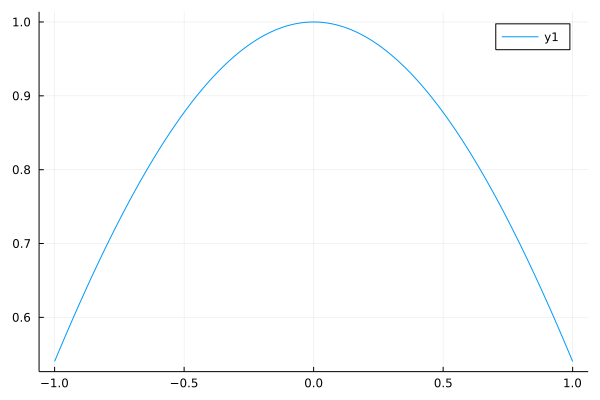

In [88]:
using Plots
x = range(-1, 1; length=1000) # Create a range of a 1000 evenly spaced numbers between -1 and 1
y = cos.(x) # Create a new vector with `cos` applied to each entry of `x`
plot(x, y)

### Installing packages (advanced)

If you choose to use Julia on your own machine, you may need to install
packages. This can be done by typing the following, either in Jupyter or in the REPL:
`] add Plots`.